In [2]:
# Binary classification
from google.colab import files
dataset=files.upload()


Saving winequality-red.csv to winequality-red.csv


In [3]:
import pandas as pd
dataset=pd.read_csv("winequality-red.csv")
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
import numpy as np
dataset=np.loadtxt("winequality-red.csv",delimiter=",",skiprows=1)
print(dataset.shape)

(1599, 12)


In [5]:
# classify the data in binary form
dataset[dataset[:,-1]<5.5,-1]=0
dataset[dataset[:,-1]>5.5,-1]=1

In [6]:
print(dataset[:10,:])

[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00 0.000e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00 0.000e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00 0.000e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00 1.000e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00 0.000e+00]
 [7.400e+00 6.600e-01 0.000e+00 1.800e+00 7.500e-02 1.300e+01 4.000e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00 0.000e+00]
 [7.900e+00 6.000e-01 6.000e-02 1.600e+00 6.900e-02 1.500e+01 5.900e+01
  9.964e-01 3.300e+00 4.600e-01 9.400e+00 0.000e+00]
 [7.300e+00 6.500e-01 0.000e+00 1.200e+00 6.500e-02 1.500e+01 2.100e+01
  9.946e-01 3.390e+00 4.700e-01 1.000e+01 1.000e+00]


In [7]:
# get the 20% data from the given dataset
index_20percent=int(0.2*len(dataset))
print(index_20percent)

319


In [8]:
# prepapre data for validation
xvalidation=dataset[:index_20percent,:-1]
yvalidation=dataset[:index_20percent,-1]

xtrain=dataset[index_20percent:,:-1]
ytrain=dataset[index_20percent:,-1]

In [13]:
#from keras.layers.attention.multi_head_attention import activation
# Define the Sequential() model
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(8,input_dim=len(xtrain[0,:]),activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [10]:
pip install keras

In [14]:
print(model.summary)

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7804eaf05a50>>


In [15]:
model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics='Accuracy')

In [16]:
history=model.fit(xtrain,ytrain,validation_data=(xvalidation,yvalidation),epochs=256,batch_size=10)


Epoch 1/256
128/128 [==============================] - 1s 4ms/step - loss: 3.8347 - Accuracy: 0.5711 - val_loss: 2.3365 - val_Accuracy: 0.3887
Epoch 2/256
128/128 [==============================] - 0s 2ms/step - loss: 0.7856 - Accuracy: 0.5781 - val_loss: 0.6810 - val_Accuracy: 0.6207
Epoch 3/256
128/128 [==============================] - 0s 2ms/step - loss: 0.6611 - Accuracy: 0.6141 - val_loss: 0.6827 - val_Accuracy: 0.5799
Epoch 4/256
128/128 [==============================] - 0s 2ms/step - loss: 0.6603 - Accuracy: 0.6148 - val_loss: 0.6779 - val_Accuracy: 0.5925
Epoch 5/256
128/128 [==============================] - 0s 2ms/step - loss: 0.6581 - Accuracy: 0.6172 - val_loss: 0.6796 - val_Accuracy: 0.5831
Epoch 6/256
128/128 [==============================] - 0s 2ms/step - loss: 0.6588 - Accuracy: 0.6102 - val_loss: 0.6756 - val_Accuracy: 0.5925
Epoch 7/256
128/128 [==============================] - 0s 2ms/step - loss: 0.6566 - Accuracy: 0.6211 - val_loss: 0.6823 - val_Accuracy: 0.5831

In [17]:
print(history.params)

{'verbose': 1, 'epochs': 256, 'steps': 128}


In [18]:
# evaludate the trainning data
evaluate=model.evaluate(xtrain,ytrain)
print(model.metrics_names)
print(evaluate[1]*100)

40/40 [==============================] - 0s 2ms/step - loss: 0.5050 - Accuracy: 0.7445
['loss', 'Accuracy']
74.45312738418579


In [19]:
# evaluate the validation data
evaluate=model.evaluate(xvalidation,yvalidation)
print(model.metrics_names)
print(evaluate[1]*100)

10/10 [==============================] - 0s 2ms/step - loss: 0.5695 - Accuracy: 0.7116
['loss', 'Accuracy']
71.15987539291382


In [20]:
from pandas.core.indexes.base import PrettyDict
# predict the model
prediction=model.predict(xvalidation)
print(prediction.round())

10/10 [==============================] - 0s 2ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

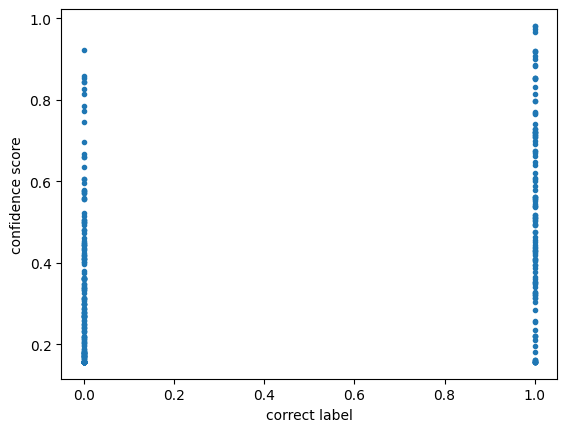

In [21]:
import matplotlib.pyplot as plt
plt.plot(yvalidation,prediction,'.')
plt.xlabel('correct label')
plt.ylabel("confidence score")
plt.show()